In [42]:
import pandas as pd 
import zipfile
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

%matplotlib inline

In [43]:
#Import the dataset
#df = pd.read_csv('creditcard.csv')
#df
zip_file = zipfile.ZipFile('creditcard.zip')
file_names = zip_file.namelist()
csv_file = zip_file.open(file_names[0])
df = pd.read_csv(csv_file)
zip_file.close()

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [44]:
#Check the size of dataset
df.shape

(284807, 31)

In [45]:
#Check the null values
df.isnull().value_counts()

Time   V1     V2     V3     V4     V5     V6     V7     V8     V9     V10    V11    V12    V13    V14    V15    V16    V17    V18    V19    V20    V21    V22    V23    V24    V25    V26    V27    V28    Amount  Class
False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False   False    284807
dtype: int64

In [5]:
#Check the duplicated rows
df.duplicated().value_counts()

False    283726
True       1081
dtype: int64

In [6]:
#Remove the duplicated rows
df.drop_duplicates(inplace=True)
df.shape

(283726, 31)

In [7]:
#Check the Class Column
df.Class.value_counts()

0    283253
1       473
Name: Class, dtype: int64

In [8]:
#Downsampling the dataset
df_zero = df[df['Class'] == 0].sample(n = 473)
df_one  = df[df['Class'] == 1]

In [9]:
#Combine these 2 datasets and shuffle the dataset 
data = pd.concat([df_zero, df_one], axis=0)
data = data.sample(frac=1)
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
249710,154541.0,2.087089,-0.249079,-1.533396,0.051680,0.339341,-0.217553,-0.061521,-0.004428,0.588761,...,-0.321368,-0.889778,0.218796,-1.199917,-0.250207,0.256386,-0.082801,-0.085126,1.29,0
124626,77363.0,-1.400124,-0.715910,1.582692,0.773669,-2.307775,1.371057,0.692387,0.690824,0.974691,...,0.287452,0.427741,0.863686,-0.095245,-0.233844,0.392637,-0.074514,0.132058,433.78,0
53467,45996.0,-0.399793,0.999423,1.375223,0.006014,-0.120664,-0.803331,0.534120,0.128299,-0.488525,...,-0.212180,-0.636812,0.012976,0.451668,-0.258057,0.045780,0.234191,0.087643,3.58,0
158633,111554.0,-0.872496,1.533986,-0.390884,-0.095360,0.888526,-1.366778,1.121661,-0.480225,1.428295,...,0.061754,0.994925,-0.052857,-0.043642,-0.252565,-0.182423,0.570092,0.452002,19.97,0
6717,8408.0,-1.813280,4.917851,-5.926130,5.701500,1.204393,-3.035138,-1.713402,0.561257,-3.796354,...,0.615642,-0.406427,-0.737018,-0.279642,1.106766,0.323885,0.894767,0.569519,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274729,166178.0,-1.983768,-0.206880,-0.805536,0.248251,-3.503047,1.914785,4.579691,-0.241717,-0.863571,...,0.553411,1.614694,0.232899,0.075289,0.645635,-0.357426,0.246082,-0.175350,984.56,0
189701,128519.0,-4.599447,2.762540,-4.656530,5.201403,-2.470388,-0.357618,-3.767189,0.061466,-1.836200,...,1.581480,0.261333,0.621415,0.994110,-0.687853,-0.337531,-1.612791,1.231425,93.35,1
68320,52934.0,1.036639,0.407227,0.757706,3.161821,-0.568122,0.202181,-0.689804,0.411380,0.336769,...,-0.050108,0.123761,-0.132568,0.350231,0.507701,0.189621,0.061016,0.063141,0.76,1
68053,52809.0,1.403770,-0.272005,-0.206865,-0.714973,-0.364989,-0.907550,-0.041771,-0.323718,-1.295168,...,0.229261,0.672569,-0.146574,0.154607,0.750839,-0.058888,-0.006684,0.000813,15.00,0


In [10]:
#Check the size of new dataset
data.shape

(946, 31)

In [11]:
#Reset Index
data = data.reset_index(drop=True)
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,154541.0,2.087089,-0.249079,-1.533396,0.051680,0.339341,-0.217553,-0.061521,-0.004428,0.588761,...,-0.321368,-0.889778,0.218796,-1.199917,-0.250207,0.256386,-0.082801,-0.085126,1.29,0
1,77363.0,-1.400124,-0.715910,1.582692,0.773669,-2.307775,1.371057,0.692387,0.690824,0.974691,...,0.287452,0.427741,0.863686,-0.095245,-0.233844,0.392637,-0.074514,0.132058,433.78,0
2,45996.0,-0.399793,0.999423,1.375223,0.006014,-0.120664,-0.803331,0.534120,0.128299,-0.488525,...,-0.212180,-0.636812,0.012976,0.451668,-0.258057,0.045780,0.234191,0.087643,3.58,0
3,111554.0,-0.872496,1.533986,-0.390884,-0.095360,0.888526,-1.366778,1.121661,-0.480225,1.428295,...,0.061754,0.994925,-0.052857,-0.043642,-0.252565,-0.182423,0.570092,0.452002,19.97,0
4,8408.0,-1.813280,4.917851,-5.926130,5.701500,1.204393,-3.035138,-1.713402,0.561257,-3.796354,...,0.615642,-0.406427,-0.737018,-0.279642,1.106766,0.323885,0.894767,0.569519,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,166178.0,-1.983768,-0.206880,-0.805536,0.248251,-3.503047,1.914785,4.579691,-0.241717,-0.863571,...,0.553411,1.614694,0.232899,0.075289,0.645635,-0.357426,0.246082,-0.175350,984.56,0
942,128519.0,-4.599447,2.762540,-4.656530,5.201403,-2.470388,-0.357618,-3.767189,0.061466,-1.836200,...,1.581480,0.261333,0.621415,0.994110,-0.687853,-0.337531,-1.612791,1.231425,93.35,1
943,52934.0,1.036639,0.407227,0.757706,3.161821,-0.568122,0.202181,-0.689804,0.411380,0.336769,...,-0.050108,0.123761,-0.132568,0.350231,0.507701,0.189621,0.061016,0.063141,0.76,1
944,52809.0,1.403770,-0.272005,-0.206865,-0.714973,-0.364989,-0.907550,-0.041771,-0.323718,-1.295168,...,0.229261,0.672569,-0.146574,0.154607,0.750839,-0.058888,-0.006684,0.000813,15.00,0


In [12]:
#Split the dataset 
X = data.drop(columns='Class')
y = data['Class']

In [13]:
#Split the data into train, validate and test data set
X_train, X_remain, y_train, y_remain = train_test_split(X, y, train_size=0.8, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_remain, y_remain, train_size=0.5, random_state= 42)

In [14]:
#Check the size of train, val and test dataset for X
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(756, 30)
(95, 30)
(95, 30)


In [15]:
#Check the size of train, val and test dataset for y
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(756,)
(95,)
(95,)


In [16]:
#Use GridSearchCV fro finding the best parameter for model
#LogisticRegression
parameters ={"C":[0.01,0.1,1],'penalty':['l1','l2','elasticnet'], 'solver':['lbfgs', 'liblinear']}

lr = LogisticRegression()
logreg_cv = GridSearchCV(lr, parameters, cv=10)
logreg_cv.fit(X_val, y_val)

c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear']})

In [17]:
#Find the best parameters and accuracy 
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
accuracy : 0.9244444444444444


In [18]:
#KNeighborClassification
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()
KNN_cv = GridSearchCV(KNN, parameters, cv=10)
KNN_cv.fit(X_val, y_val)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [19]:
#Find the best parameters and accuracy 
print("tuned hpyerparameters :(best parameters) ",KNN_cv.best_params_)
print("accuracy :",KNN_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 1, 'p': 1}
accuracy : 0.6188888888888889


In [20]:
#Train model 
#Logistic Regression 

lr = LogisticRegression(C=1, penalty='l2', solver='liblinear')
lr.fit(X_train, y_train)

LogisticRegression(C=1, solver='liblinear')

In [22]:
#Predict test set
y_pred = lr.predict(X_test)

In [24]:
#Performed the accuracy score
print('Accuracy score:', accuracy_score(y_test, y_pred))
print('F1_score:', f1_score(y_test, y_pred))

Accuracy score: 0.9368421052631579
F1_score: 0.9375


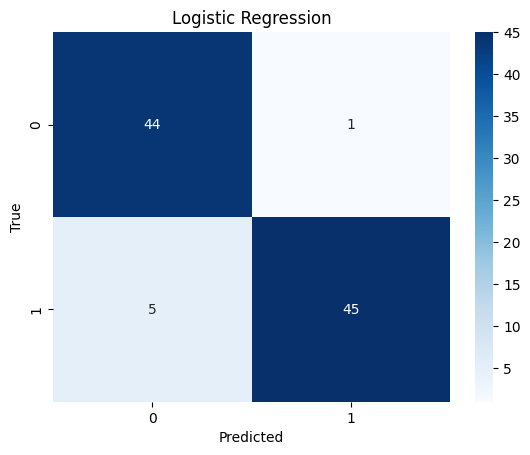

In [26]:
#Visualize the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [38]:
#Train model 
#KNN 

KNN = KNeighborsClassifier(algorithm='auto', n_neighbors=1, p=1)
KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1, p=1)

In [39]:
#Predict test set
y_pred2 = KNN.predict(X_test)

In [40]:
#Performed the accuracy score
print('Accuracy score:', accuracy_score(y_test, y_pred2))
print('F1_score:', f1_score(y_test, y_pred2))

Accuracy score: 0.6736842105263158
F1_score: 0.686868686868687


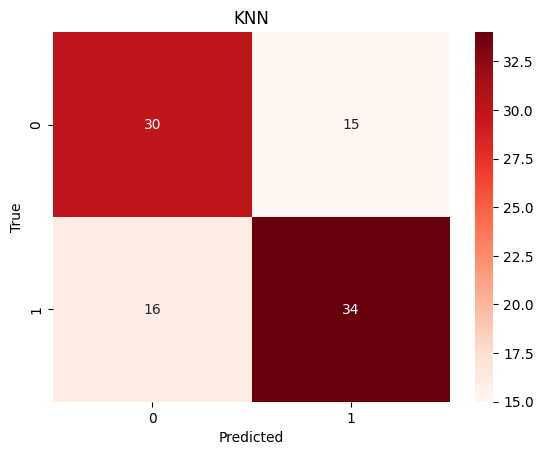

In [41]:
#Visualize the confusion matrix
conf_matrix2 = confusion_matrix(y_test, y_pred2)
sns.heatmap(conf_matrix2, annot=True, cmap='Reds', fmt='g')
plt.title('KNN')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()